# Segment Cells with Seeded Watershed

In this notebook, we will segment cells from a fluorescence microscopy image using the seeded watershed algorithm starting from local minima.

### Steps to be followed:
1. Load the image
2. Pre-process the image
3. Apply local minima as seeds
4. Perform watershed segmentation
5. Save and display the segmented label image

## Step 1: Load the Image

We will load the image `membranes.png` from the data directory.

In [1]:
from skimage.io import imread

# Load the image
image_path = '../data/membranes.png'
image = imread(image_path)

## Step 2: Pre-process the Image

We will apply a Gaussian blur to the image to reduce noise and enhance the structures for segmentation.

In [2]:
import napari_simpleitk_image_processing as nsitk

# Apply Gaussian Blur
smoothed_image = nsitk.gaussian_blur(image, variance_x=1, variance_y=1)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_skimage_regionprops/_table.py:7: UserWarning: No Qt bindings could be found
  warnings.warn(str(e))


## Step 3: Apply Local Minima as Seeds

We will determine the local minima to use as seeds for the watershed algorithm. This helps in identifying potential starting points for segmenting each cell.

In [3]:
# Identify local minima
local_minima = nsitk.regional_maxima(-smoothed_image)

## Step 4: Perform Watershed Segmentation

Using the pre-processed image and identified seeds, perform the watershed segmentation.

In [4]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm

# Perform seeded watershed segmentation
label_image = nsbatwm.seeded_watershed(smoothed_image, local_minima)

## Step 5: Save and Display the Segmented Label Image

Finally, let's save the segmented label image in RGB format and end with displaying it.

/tmp/ipykernel_2180/2931438380.py:14: UserWarning: ../data/segmented_cells.png is a low contrast image
  imsave(output_path, label_rgb_uint8)


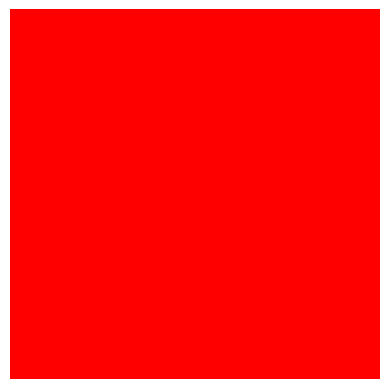

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from skimage.io import imsave

# Convert label image to RGB
label_rgb = label2rgb(label_image, bg_label=0)

# Convert to uint8
label_rgb_uint8 = (255 * label_rgb).astype(np.uint8)

# Save the rgb label image
output_path = '../data/segmented_cells.png'
imsave(output_path, label_rgb_uint8)

# Display the result
plt.imshow(label_rgb_uint8)
plt.axis('off')
plt.show()